# 05 - Analyzing Electric Consumption Data with Spark SQL

**Author:** Adrián Romero Flores  
**Repository:** [link](https://github.com/adrrf/bigdata/tree/main/05-spark-sql)

---

## Overview

1. [Introduction](#introduction)  
2. [Environment Setup](#environment)  
3. [Data Loading](#data-loading)  
4. [Data Analysis](#data-analysis)  
5. [Results and Conclusions](#results-and-conclusions)

## Introduction

## Environment Setup

## Data Loading

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
# define the struct of types
schema = StructType([
    StructField("IDENTIFICADOR", StringType(), True),
    StructField("ANOMES", StringType(), True),
    StructField("CNAE", StringType(), True),
    StructField("PRODUCTO", StringType(), True),
    StructField("MERCADO", StringType(), True),
    StructField("ACTIVA_H1", DoubleType(), True),
    StructField("ACTIVA_H2", DoubleType(), True),
    StructField("ACTIVA_H3", DoubleType(), True),
    StructField("ACTIVA_H4", DoubleType(), True),
    StructField("ACTIVA_H5", DoubleType(), True),
    StructField("ACTIVA_H6", DoubleType(), True),
    StructField("ACTIVA_H7", DoubleType(), True),
    StructField("ACTIVA_H8", DoubleType(), True),
    StructField("ACTIVA_H9", DoubleType(), True),
    StructField("ACTIVA_H10", DoubleType(), True),
    StructField("ACTIVA_H11", DoubleType(), True),
    StructField("ACTIVA_H12", DoubleType(), True),
    StructField("ACTIVA_H13", DoubleType(), True),
    StructField("ACTIVA_H14", DoubleType(), True),
    StructField("ACTIVA_H15", DoubleType(), True),
    StructField("ACTIVA_H16", DoubleType(), True),
    StructField("ACTIVA_H17", DoubleType(), True),
    StructField("ACTIVA_H18", DoubleType(), True),
    StructField("ACTIVA_H19", DoubleType(), True),
    StructField("ACTIVA_H20", DoubleType(), True),
    StructField("ACTIVA_H21", DoubleType(), True),
    StructField("ACTIVA_H22", DoubleType(), True),
    StructField("ACTIVA_H23", DoubleType(), True),
    StructField("ACTIVA_H24", DoubleType(), True),
    StructField("ACTIVA_H25", DoubleType(), True),
    StructField("REACTIVA_H1", DoubleType(), True),
    StructField("REACTIVA_H2", DoubleType(), True),
    StructField("REACTIVA_H3", DoubleType(), True),
    StructField("REACTIVA_H4", DoubleType(), True),
    StructField("REACTIVA_H5", DoubleType(), True),
    StructField("REACTIVA_H6", DoubleType(), True),
    StructField("REACTIVA_H7", DoubleType(), True),
    StructField("REACTIVA_H8", DoubleType(), True),
    StructField("REACTIVA_H9", DoubleType(), True),
    StructField("REACTIVA_H10", DoubleType(), True),
    StructField("REACTIVA_H11", DoubleType(), True),
    StructField("REACTIVA_H12", DoubleType(), True),
    StructField("REACTIVA_H13", DoubleType(), True),
    StructField("REACTIVA_H14", DoubleType(), True),
    StructField("REACTIVA_H15", DoubleType(), True),
    StructField("REACTIVA_H16", DoubleType(), True),
    StructField("REACTIVA_H17", DoubleType(), True),
    StructField("REACTIVA_H18", DoubleType(), True),
    StructField("REACTIVA_H19", DoubleType(), True),
    StructField("REACTIVA_H20", DoubleType(), True),
    StructField("REACTIVA_H21", DoubleType(), True),
    StructField("REACTIVA_H22", DoubleType(), True),
    StructField("REACTIVA_H23", DoubleType(), True),
    StructField("REACTIVA_H24", DoubleType(), True),
    StructField("REACTIVA_H25", DoubleType(), True)
])
# read csv without header
df = spark.read.csv("/FileStore/tables/endesaAgregada.csv", header=False, schema=schema)

In [0]:
# let's remove the ACTIVA_H25 column
df = df.drop("ACTIVA_H25")
# let's remove all REACTIVA_HX columns
reactiva_columns = [f"REACTIVA_H{i}" for i in range(1, 25)]

df = df.drop(*reactiva_columns)
print(f"columns after removal: {len(df.columns)} columns")

columns after removal: 30 columns


In [0]:
activa_columns = [f"ACTIVA_H{i}" for i in range(1, 25)]
df_negatives = df.filter(
    " OR ".join([f"{columna} < 0" for columna in activa_columns])
)
print(f"number of rows with negative values: {df_negatives.count()}")
df = df.subtract(df_negatives)

number of rows with negative values: 4


## Data Analysis

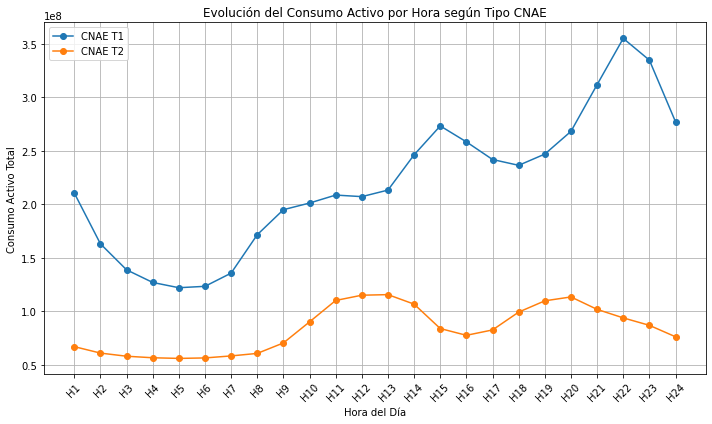

In [0]:
# queries no typed api -> because pyhton
# aggregated consumption per hour grouped by cnae 
from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt

activa_columns = [f"ACTIVA_H{i}" for i in range(1, 25)]
agg_cnae = df.groupBy("CNAE").agg(*[_sum(col).alias(col) for col in activa_columns])

agg_cnae_pd = agg_cnae.toPandas()
agg_cnae_pd.set_index("CNAE", inplace=True)
agg_cnae_pd = agg_cnae_pd.transpose()
agg_cnae_pd.index = [f"H{i}" for i in range(1, 25)]

plt.figure(figsize=(10, 6))
for cnae_type in agg_cnae_pd.columns:
    plt.plot(agg_cnae_pd.index, agg_cnae_pd[cnae_type], marker='o', label=f'CNAE {cnae_type}')

plt.title("Evolución del Consumo Activo por Hora según Tipo CNAE")
plt.xlabel("Hora del Día")
plt.ylabel("Consumo Activo Total")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

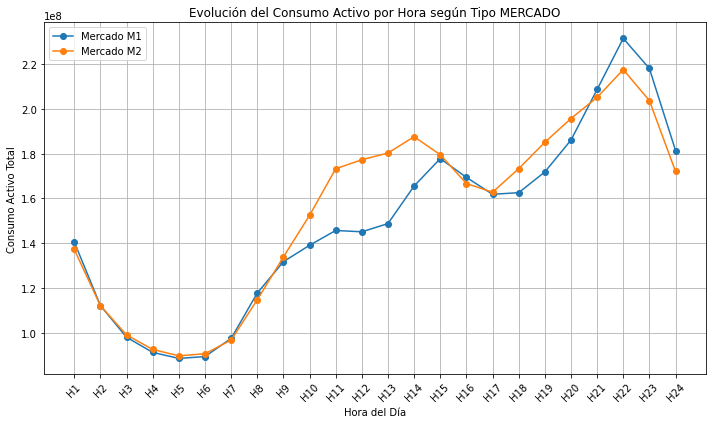

In [0]:
# aggregated consumption per hour grouped by mercado 
agg_mercado = df.groupBy("MERCADO").agg(*[_sum(col).alias(col) for col in activa_columns])

agg_mercado_pd = agg_mercado.toPandas()
agg_mercado_pd.set_index("MERCADO", inplace=True)
agg_mercado_pd = agg_mercado_pd.transpose()
agg_mercado_pd.index = [f"H{i}" for i in range(1, 25)]

plt.figure(figsize=(10, 6))
for cnae_type in agg_mercado_pd.columns:
    plt.plot(agg_mercado_pd.index, agg_mercado_pd[cnae_type], marker='o', label=f'Mercado {cnae_type}')

plt.title("Evolución del Consumo Activo por Hora según Tipo MERCADO")
plt.xlabel("Hora del Día")
plt.ylabel("Consumo Activo Total")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
df.createOrReplaceTempView("consumo")

In [0]:
avg_cnae = spark.sql("""
SELECT CNAE,
  AVG(ACTIVA_H1) AS H1,  AVG(ACTIVA_H2) AS H2,  AVG(ACTIVA_H3) AS H3,
  AVG(ACTIVA_H4) AS H4,  AVG(ACTIVA_H5) AS H5,  AVG(ACTIVA_H6) AS H6,
  AVG(ACTIVA_H7) AS H7,  AVG(ACTIVA_H8) AS H8,  AVG(ACTIVA_H9) AS H9,
  AVG(ACTIVA_H10) AS H10, AVG(ACTIVA_H11) AS H11, AVG(ACTIVA_H12) AS H12,
  AVG(ACTIVA_H13) AS H13, AVG(ACTIVA_H14) AS H14, AVG(ACTIVA_H15) AS H15,
  AVG(ACTIVA_H16) AS H16, AVG(ACTIVA_H17) AS H17, AVG(ACTIVA_H18) AS H18,
  AVG(ACTIVA_H19) AS H19, AVG(ACTIVA_H20) AS H20, AVG(ACTIVA_H21) AS H21,
  AVG(ACTIVA_H22) AS H22, AVG(ACTIVA_H23) AS H23, AVG(ACTIVA_H24) AS H24
FROM consumo
GROUP BY CNAE
ORDER BY CNAE
""")

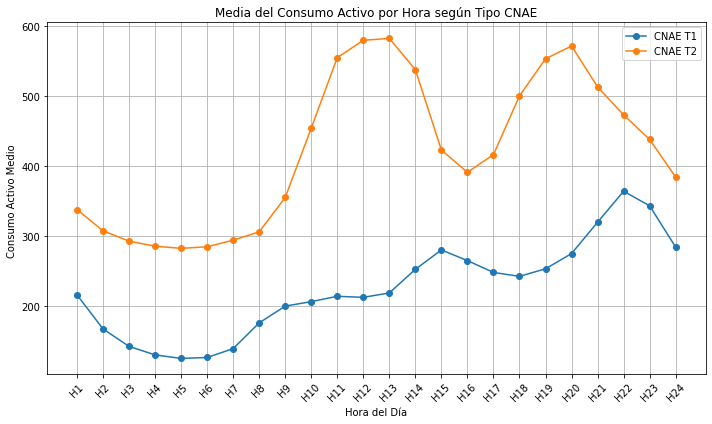

In [0]:
df_avg_cnae = avg_cnae.toPandas()
df_avg_cnae.set_index("CNAE", inplace=True)
df_avg_cnae = df_avg_cnae.transpose()
df_avg_cnae.index = [f"H{i}" for i in range(1, 25)]

plt.figure(figsize=(10, 6))
for col in df_avg_cnae.columns:
    plt.plot(df_avg_cnae.index, df_avg_cnae[col], marker='o', label=f"CNAE {col}")

plt.title("Media del Consumo Activo por Hora según Tipo CNAE")
plt.xlabel("Hora del Día")
plt.ylabel("Consumo Activo Medio ")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
top_10_consumers = spark.sql("""
SELECT IDENTIFICADOR,
  SUM(
    ACTIVA_H1 + ACTIVA_H2 + ACTIVA_H3 + ACTIVA_H4 + ACTIVA_H5 + ACTIVA_H6 +
    ACTIVA_H7 + ACTIVA_H8 + ACTIVA_H9 + ACTIVA_H10 + ACTIVA_H11 + ACTIVA_H12 +
    ACTIVA_H13 + ACTIVA_H14 + ACTIVA_H15 + ACTIVA_H16 + ACTIVA_H17 + ACTIVA_H18 +
    ACTIVA_H19 + ACTIVA_H20 + ACTIVA_H21 + ACTIVA_H22 + ACTIVA_H23 + ACTIVA_H24
  ) AS TOTAL
FROM consumo
GROUP BY IDENTIFICADOR
ORDER BY TOTAL DESC
LIMIT 10
""")
top_10_consumers.show()

+-------------+---------+
|IDENTIFICADOR|    TOTAL|
+-------------+---------+
|        15455|4260686.5|
|        14181|3720379.5|
|        16941|3645076.0|
|        11411|3214868.5|
|        10618|3174944.0|
|        13009|3158501.5|
|        13232|3136844.5|
|        11656|3070493.0|
|        11218|2992956.5|
|        10916|2935226.0|
+-------------+---------+



In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def get_season(ano_mes: int) -> str:
    mes = int(str(ano_mes)[-2:])
    if mes in [12, 1, 2]:
        return "winter"
    elif mes in [3, 4, 5]:
        return "spring"
    elif mes in [6, 7, 8]:
        return "summer"
    elif mes in [9, 10, 11]:
        return "autumn"
    else:
        return "unkown"
    
season_udf = udf(get_season, StringType())
df = df.withColumn("SEASON", season_udf(df["ANOMES"]))

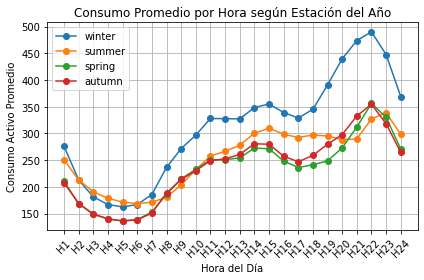

In [0]:
from pyspark.sql.functions import avg

avg_season = df.groupBy("SEASON").agg(
    *[avg(col).alias(col) for col in activa_columns]
)

avg_season_pd = avg_season.toPandas()
avg_season_pd.set_index("SEASON", inplace=True)
avg_season_pd = avg_season_pd.transpose()
avg_season_pd.index = [f"H{i}" for i in range(1, 25)]

for season in avg_season_pd.columns:
    plt.plot(avg_season_pd.index, avg_season_pd[season], marker='o', label=season)

plt.title("Consumo Promedio por Hora según Estación del Año")
plt.xlabel("Hora del Día")
plt.ylabel("Consumo Activo Promedio")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
%sql 
SELECT CNAE, MERCADO, COUNT(*) AS total
FROM consumo
GROUP BY CNAE, MERCADO
ORDER BY CNAE, MERCADO;

CNAE,MERCADO,total
T1,M1,556046
T1,M2,418756
T2,M1,121578
T2,M2,76985


Databricks visualization. Run in Databricks to view.

## Results and Conclusions